# Dublin House Prices by Post Code
## Part 4 - Breaking Down the Data
We collected and cleaned the Property Price Register house price data in Part 1. In Part 2, we created a Google API object to help us find eirKeys for the addresses, and we then used a Naive Bayes machine learning algorithm to fill as many empty eirKey fields as we could. Now, it's time to examine the data and see what's been going on in the Dublin Housing market so far in 2016.

In [50]:
import pandas as pd
import bokeh.charts as bc
import bokeh.plotting as bp
import pickle
from __future__ import unicode_literals # So we can use the Euro symbol in the Bokeh plots

In [2]:
with open('../library/pickle/2016/prices_final_dublin_2016_pickle', 'r') as f:
    houses = pickle.load(f)
houses.describe()

,Lat,Lon,Price
count,10514.000000,10514.000000,1.127000e+04
mean,53.352123,-6.263577,4.002353e+05
std,0.071453,0.089437,7.359560e+05
min,53.202946,-6.501789,6.500000e+03
25%,53.297334,-6.317503,2.200000e+05
50%,53.343143,-6.255972,3.030000e+05
75%,53.385494,-6.199972,4.500000e+05
max,53.626983,-6.052932,6.408506e+07


### Dublin House Prices

/Users/anthonymunnelly/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


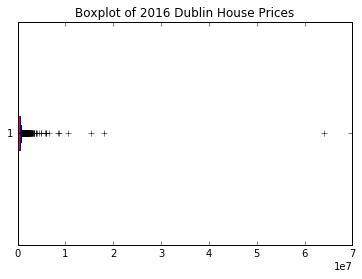

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

We can see that there is one price here that is more than a little bigger than the rest.

In [4]:
houses[houses.Price == houses.Price.max()]

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
6544,"Westpark, Tallaght, Dublin 24, Ireland",2016-01-15,New Dwelling house /Apartment,No,53.287019,-6.364894,64085057.0,greater than or equal to 38 sq metres and less...,Yes,D24,Tallaght


In [5]:
print "This costs €{:,.2f}.".format(houses[houses.Price == houses.Price.max()]['Price'].loc[6544]) 

This costs €64,085,057.00.


Sixty-four million Euro is a considerable chunk of change for "a" house. Again, as we said in Part 1, the sparse descriptions of the properties in the dataset don't always help us understand what's there.

We'll exclude this value from the dataset and carry on.

In [6]:
houses = houses[houses.Price < houses.Price.max()].copy()
houses.Price.describe()

count    1.126900e+04
mean     3.945840e+05
std      4.262765e+05
min      6.500000e+03
25%      2.200000e+05
50%      3.030000e+05
75%      4.500000e+05
max      1.815000e+07
Name: Price, dtype: float64

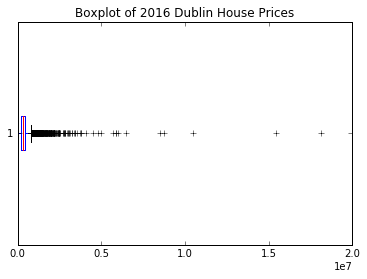

In [7]:
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

### The Ten Most Expensive Houses

In [8]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price', ascending = False).head(10)

,Address,Date,Description,Price,Size,eirKey
9443,"1 Coldcut Cres, Coldcut, Dublin 22, Ireland",2016-08-31,Second-Hand Dwelling house /Apartment,18150000.0,,D20
10677,"KYLEMORE CLINIC, 49 CHURCH ROAD, BALLYBRACK",2016-04-07,Second-Hand Dwelling house /Apartment,15450000.0,,A96
7250,"Johnstown Rd, Cabinteely, Co. Dublin, Ireland",2016-03-10,Second-Hand Dwelling house /Apartment,10500000.0,,A96
8000,"19 Temple Rd, Dublin, Ireland",2016-05-18,Second-Hand Dwelling house /Apartment,8725000.0,,D06
10823,"APARTMENTS 1-21, BROADSTONE HALL, PHIBSBORO ROAD",2016-06-02,Second-Hand Dwelling house /Apartment,8500000.0,,glugger
1904,"5 Temple Pl, Dublin 6, D06 K772, Ireland",2016-04-22,Second-Hand Dwelling house /Apartment,6500000.0,,D06
9675,"Beulah House, Harbour Rd, Glenageary, Dalkey, ...",2016-09-15,Second-Hand Dwelling house /Apartment,6000000.0,,A96
6080,"51 Ailesbury Rd, Dublin 4, D04 YY59, Ireland",2016-10-28,Second-Hand Dwelling house /Apartment,5900000.0,,D04
8653,"1 Temple Gardens, Dublin, Ireland",2016-07-01,Second-Hand Dwelling house /Apartment,5850000.0,,D06
8820,"Cedar Lodge, Merrion Rd, Dublin 4, Ireland",2016-07-12,Second-Hand Dwelling house /Apartment,5700000.0,,D04


### The Ten Least Expensive Houses

In [9]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price').head(10)

,Address,Date,Description,Price,Size,eirKey
5381,"2A Ashton Cl, Ballyroan, Dublin 16, D16 C672, ...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
5374,"2 Ashton Cl, Ballyroan, Dublin 16, D16 T0C6, I...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
98,"1 Strand Rd, Dublin 4, D04 W9K6, Ireland",2016-01-12,Second-Hand Dwelling house /Apartment,9000.0,,D04
1171,"13 Castlecurragh Heath, Buzzardstown, Dublin 1...",2016-03-10,Second-Hand Dwelling house /Apartment,9031.0,,D15
4187,"652 Whitechurch Rd, Rathfarnham, Dublin 16, D1...",2016-08-10,Second-Hand Dwelling house /Apartment,10000.0,,D16
897,"46 Kenilworth Square S, Dublin 6, D06 Y152, Ir...",2016-02-25,Second-Hand Dwelling house /Apartment,10000.0,,D06
610,"76 Boot Rd, Brideswell Commons, Dublin 22, D22...",2016-02-11,Second-Hand Dwelling house /Apartment,10476.0,,D22
5652,"92 Westhaven, Huntstown, Dublin 15, D15 A6KK, ...",2016-10-11,Second-Hand Dwelling house /Apartment,11000.0,,D15
5476,"7 Clancarthy Rd, Clontarf, Dublin 5, D05 PE03,...",2016-10-03,Second-Hand Dwelling house /Apartment,12000.0,,D05
2201,"19A Cloonlara Rd, Finglas South, Dublin 11, D1...",2016-05-09,Second-Hand Dwelling house /Apartment,12000.0,,D11


### Houses Sold by eirKeyName
Let's look at a boxplot of house prices broken down by eirKey. We'll only include those postal areas for which we have one hundred or more data points.

In [10]:
houses.eirKeyName.value_counts()

Castleknock      956
Killiney         575
Stepaside        557
Tallaght         555
Blackrock        537
Crumlin          535
Ballsbridge      520
Cabra            519
Donaghmede       471
Rathmines        470
Swords           464
Malahide         460
Churchtown       454
Finglas          441
Ballinteer       438
Drumcondra       432
Lucan            365
Dolphins Barn    362
Clontarf         348
Raheny           308
Balbriggan       245
Clondalkin       240
D02              150
D01              142
Skerries         118
Ballyfermot      118
Rush              79
Palmerstown       73
Lusk              55
Coolock           55
Bray              20
Oldtown Court      3
Ballyboughal       1
Dunboyne           1
Garristown         1
Name: eirKeyName, dtype: int64

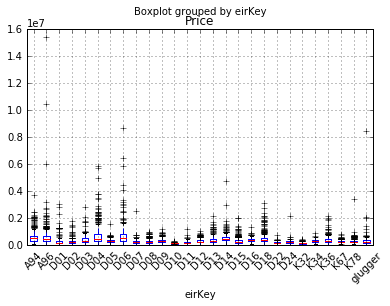

In [11]:
houses_list = list(houses.eirKey.value_counts().keys())
eirKeyBoxplotData = houses[houses['eirKey'].isin(houses_list[:-10])]
eirKeyBoxplotData.boxplot('Price', 'eirKey', rot=45)

### Removing More Outliers
Again, we see house prices here that are so large they are crushing the distribution visibility of the others. Therefore, we'll cap our house prices at five million Euro or less, and look again.

In [12]:
bc.output_notebook()
eirKeyBoxplotData = eirKeyBoxplotData[eirKeyBoxplotData.Price < 5000000]
price_v_postcode_boxplot = bc.BoxPlot(eirKeyBoxplotData,
                                      values='Price',
                                      label='eirKeyName',
                                     color = 'skyblue',
                                     whisker_color = 'navy',
                                     marker = 'diamond',
                                     legend = False)

price_v_postcode_boxplot.width = 800
from bokeh.models import NumeralTickFormatter
price_v_postcode_boxplot._yaxis.formatter = NumeralTickFormatter(format = ("€0,000 a"))
price_v_postcode_boxplot.title.text = 'Price v Post Code, 2016-to-Date'
bc.show(price_v_postcode_boxplot)

Loading BokehJS ...

### Conclusions
The boxplot is the most eloquent of all the graphs that show data, because it shows the most information in the least amount of space. From one single boxplot we can clearly see:
1. Although the most houses sold - for which we have data - are in Dublin 15/Castleknock, these are by no means the most expensive.
2. Although the spread of house prices is clearly different for every post code, it is possible to pay well over the odds in any postcode. Every single boxplot above shows outlier data, and that's after capping the value of the houses at five million Euro.
3. The least-expensive place to buy a house in 2016 is Dublin 10/Ballyfermot. It's also got the smallest inter-quantile range of all the postal areas. The most expensive house in Dublin 10 just about makes it to the first quartile of house prices in Dublin 4.

### When Were the Houses Sold?
It is remarkable that so many houses are being sold in Dublin 15. If we look at house sales broken down by date and by postal area, can we see if there is any pattern there?

In [25]:
from bokeh.models import DatetimeTickFormatter, HoverTool

bp.output_notebook()

timeplot = bp.figure(width = 1000, height = 800)

colors = ['red', 'orange', 'purple', 'green', 'blue', 'black', 'coral']

pcs = houses.groupby('eirKeyName')
counter = 0
current_source = {}
renderer = {}
for pc, details in pcs:
    plot_from_zero = pd.DataFrame([0, 0])
    temp = details.copy()
    temp = temp[['Date', 'Address']]
    temp = temp.set_index('Date')
    temp = temp.resample('W').count()
    
    current_source = bp.ColumnDataSource(data = {"pc":[pc],
                                                    "sales":temp.Address.values})
    
    renderer[pc] = timeplot.line(temp.index,
                                 temp.Address.cumsum(),
                                 legend = pc,
                                 color = colors[counter],
                                 alpha = 0.25,
                                 line_width = 2,
                                 hover_alpha = 1,
                                hover_color = colors[counter])
    
    myTooltips = """
                <div>
                    <span style="font-size: 17px; font-weight: bold; color: {}">{}</span>
                </div>
                """
    
    timeplot.add_tools(HoverTool(tooltips = myTooltips.format(colors[counter], pc),
                                renderers = [renderer[pc]],
                                mode = 'mouse'))
    
    
    if counter == 6:
        counter = 0
    else:
        counter += 1
        
timeplot.title.text = "Count of Sales over Time"
# timeplot.xaxis.formatter = DatetimeTickFormatter(formats =dict(hours=["%H:%M"],
#                                                                 days=["%b %d"],
#                                                                 months=["%b '%y"],
#                                                                 years=["%b %Y"]))
timeplot.xaxis.formatter = DatetimeTickFormatter()

bp.show(timeplot)

Loading BokehJS ...

### Mapping the Houses Sold
All to come in [Part 5]().

# 2015

In [14]:
with open("/Users/anthonymunnelly/Desktop/house_prices_2015/prices_final_dublin_2015_pickle") as f:
    houses2015 = pickle.load(f)
    
houses2015.head()

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
0,"4 Shrewsbury, Dublin 4, D04 F2W5, Ireland",2015-01-02,Second-Hand Dwelling house /Apartment,No,53.325366,-6.220155,900000.0,,No,D04,Donnybrook
1,"12 Navan Rd, Villa Park Ave, Ashtown, Dublin 7...",2015-01-05,Second-Hand Dwelling house /Apartment,No,53.364181,-6.311671,510000.0,,No,D07,Cabra
2,"147 Owen's Ave, Ceannt Fort, Mount Brown, Dubl...",2015-01-05,Second-Hand Dwelling house /Apartment,No,53.341012,-6.296926,306000.0,,No,D08,Dolphins Barn
3,"15 Cruise Park Dr, Tyrrelstown, Dublin 15, D15...",2015-01-05,Second-Hand Dwelling house /Apartment,No,53.418640,-6.393181,160000.0,,No,D15,Castleknock
4,"2 Linnetfields Ct, Castaheany, Clonee, Co. Dub...",2015-01-05,Second-Hand Dwelling house /Apartment,No,53.399187,-6.439088,142000.0,,No,D15,Castleknock


In [15]:
houses2015.describe()

,Lat,Lon,Price
count,11038.000000,11038.000000,1.325500e+04
mean,53.335000,-6.274702,3.543697e+05
std,0.045720,0.088091,3.462394e+05
min,53.193504,-6.503346,5.500000e+03
25%,53.293041,-6.330602,1.900000e+05
50%,53.337598,-6.267726,2.750000e+05
75%,53.373652,-6.215057,4.116300e+05
max,53.426158,-6.053658,1.040000e+07


In [16]:
houses2015.sort_values("Price", ascending = False).head(10)

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
10245,"Rathfarnham, Dublin, Ireland",2015-11-03,Second-Hand Dwelling house /Apartment,No,53.300498,-6.283854,10400000.00,,No,D14,Churchtown
12489,"SORRENTO HOUSE, 1 SORRENTO TERRACE, SORRENTO ROAD",2015-08-31,Second-Hand Dwelling house /Apartment,No,NaN,NaN,10000000.00,,No,glugger,NaN
10549,"Kenah Hill, St George's Ave, Rocheshill, Killi...",2015-11-27,Second-Hand Dwelling house /Apartment,No,53.261294,-6.119492,9000000.00,,No,A96,Killiney
8661,"12, West Park Gate, Bóthar an tSeanbhábhúin, T...",2015-06-15,New Dwelling house /Apartment,No,53.287380,-6.362599,7743017.58,greater than or equal to 38 sq metres and less...,Yes,D24,Tallaght
7093,"Strathmore Rd, Dublin, Ireland",2015-02-04,Second-Hand Dwelling house /Apartment,No,53.259770,-6.113644,7500000.00,,No,A96,Killiney
9765,"Pairc Na Greine, Cookstown Rd, Springfield, Du...",2015-09-18,New Dwelling house /Apartment,No,53.287068,-6.390184,6412500.00,greater than or equal to 38 sq metres and less...,Yes,D24,Tallaght
11037,"Alexander Court, Pembroke Street Upper, Dublin...",2015-12-30,Second-Hand Dwelling house /Apartment,No,53.334872,-6.254379,6275000.00,,No,D02,D02
7749,"Ballsbridge, Co. Dublin, Ireland",2015-04-14,Second-Hand Dwelling house /Apartment,No,53.328870,-6.230524,4800000.00,,No,D04,Donnybrook
9900,"Bolton Hall, Glendoher Rd, Rathfarnham, Dublin...",2015-10-01,Second-Hand Dwelling house /Apartment,No,53.284707,-6.293155,4739000.00,,No,D16,Dundrum
11682,"Abington Wood, Malahide, Co Dublin",2015-04-27,Second-Hand Dwelling house /Apartment,No,NaN,NaN,4655000.00,,No,glugger,NaN


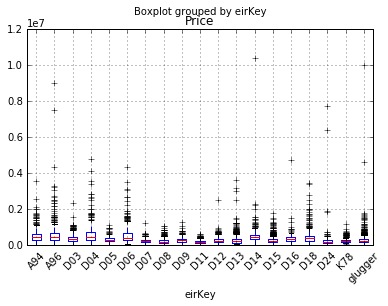

In [19]:
houses_list15 = list(houses2015.eirKey.value_counts().keys())
eirKeyBoxplotData15 = houses2015[houses2015['eirKey'].isin(houses_list15[:-10])]
eirKeyBoxplotData15.boxplot('Price', 'eirKey', rot=45)

In [51]:
bc.output_notebook()
eirKeyBoxplotData15 = eirKeyBoxplotData15[eirKeyBoxplotData15.Price < 5000000]
price_v_postcode_boxplot = bc.BoxPlot(eirKeyBoxplotData15,
                                      values='Price',
                                      label='eirKeyName',
                                     color = 'skyblue',
                                     whisker_color = 'navy',
                                     marker = 'diamond',
                                     legend = False)

price_v_postcode_boxplot.width = 800
from bokeh.models import NumeralTickFormatter
price_v_postcode_boxplot._yaxis.formatter = NumeralTickFormatter(format = ("€0,000 a"))
price_v_postcode_boxplot.title.text = 'Price v Post Code, 2015'
bc.show(price_v_postcode_boxplot)

Loading BokehJS ...

In [26]:
bp.output_notebook()

timeplot = bp.figure(width = 1000, height = 800)

colors = ['red', 'orange', 'purple', 'green', 'blue', 'black', 'coral']

pcs = houses2015.groupby('eirKeyName')
counter = 0
current_source = {}
renderer = {}
for pc, details in pcs:
    plot_from_zero = pd.DataFrame([0, 0])
    temp = details.copy()
    temp = temp[['Date', 'Address']]
    temp = temp.set_index('Date')
    temp = temp.resample('W').count()
    
    current_source = bp.ColumnDataSource(data = {"pc":[pc],
                                                    "sales":temp.Address.values})
    
    renderer[pc] = timeplot.line(temp.index,
                                 temp.Address.cumsum(),
                                 legend = pc,
                                 color = colors[counter],
                                 alpha = 0.25,
                                 line_width = 2,
                                 hover_alpha = 1,
                                hover_color = colors[counter])
    
    myTooltips = """
                <div>
                    <span style="font-size: 17px; font-weight: bold; color: {}">{}</span>
                </div>
                """
    
    timeplot.add_tools(HoverTool(tooltips = myTooltips.format(colors[counter], pc),
                                renderers = [renderer[pc]],
                                mode = 'mouse'))
    
    
    if counter == 6:
        counter = 0
    else:
        counter += 1
        
timeplot.title.text = "Count of Sales over Time, 2015"
timeplot.xaxis.formatter = DatetimeTickFormatter()

bp.show(timeplot)

Loading BokehJS ...

In [43]:
bothYears = pd.concat([houses, houses2015], ignore_index=True)
bothYears.describe()

,Lat,Lon,Price
count,21551.000000,21551.000000,2.452400e+04
mean,53.343356,-6.269270,3.728485e+05
std,0.060286,0.088922,3.856015e+05
min,53.193504,-6.503346,5.500000e+03
25%,53.295176,-6.323942,2.025000e+05
50%,53.340298,-6.262619,2.885398e+05
75%,53.378569,-6.208124,4.300000e+05
max,53.626983,-6.052932,1.815000e+07


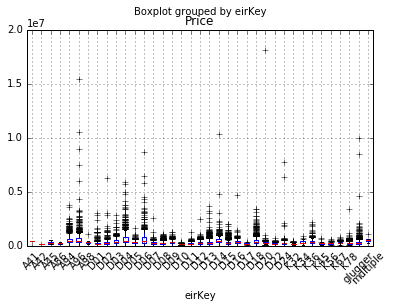

In [44]:
bothYears.boxplot('Price', 'eirKey', rot=45)

In [45]:
bothYears.eirKey.value_counts()

D15         2021
glugger     1985
D24         1354
A94         1220
A96         1165
D12         1165
D13         1134
D04         1077
D16         1071
D18         1058
D07         1037
D11          994
D06          987
D09          948
D14          926
D03          837
K78          833
D08          815
D05          655
D22          541
K67          465
K36          460
D01          422
D02          278
D10          252
K32          245
D20          166
K34          118
D17          107
K56           79
K45           55
A98           41
multiple       6
A45            3
A86            2
A41            1
A42            1
Name: eirKey, dtype: int64

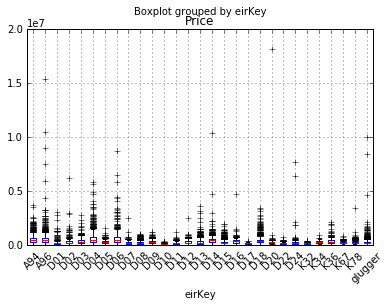

In [46]:
houses_list_both = list(bothYears.eirKey.value_counts().keys())
eirKeyBoxplotData_both = bothYears[bothYears['eirKey'].isin(houses_list_both[:-8])]
eirKeyBoxplotData_both.boxplot('Price', 'eirKey', rot=45)

In [47]:
bc.output_notebook()
eirKeyBoxplotData = eirKeyBoxplotData_both[eirKeyBoxplotData_both.Price < 5000000]
price_v_postcode_boxplot = bc.BoxPlot(eirKeyBoxplotData,
                                      values='Price',
                                      label='eirKey',
                                     color = 'skyblue',
                                     whisker_color = 'navy',
                                     marker = 'diamond',
                                     legend = False)

price_v_postcode_boxplot.width = 800
from bokeh.models import NumeralTickFormatter
price_v_postcode_boxplot._yaxis.formatter = NumeralTickFormatter(format = ("€0,000 a"))
price_v_postcode_boxplot.title.text = 'Price v Post Code, Both Years'
bc.show(price_v_postcode_boxplot)

Loading BokehJS ...

In [48]:
bp.output_notebook()

timeplot = bp.figure(width = 1000, height = 800)

colors = ['red', 'orange', 'purple', 'green', 'blue', 'black', 'coral']

pcs = bothYears.groupby('eirKey')
counter = 0
current_source = {}
renderer = {}
for pc, details in pcs:
    plot_from_zero = pd.DataFrame([0, 0])
    temp = details.copy()
    temp = temp[['Date', 'Address']]
    temp = temp.set_index('Date')
    temp = temp.resample('W').count()
    
    current_source = bp.ColumnDataSource(data = {"pc":[pc],
                                                    "sales":temp.Address.values})
    
    renderer[pc] = timeplot.line(temp.index,
                                 temp.Address.cumsum(),
                                 legend = pc,
                                 color = colors[counter],
                                 alpha = 0.25,
                                 line_width = 2,
                                 hover_alpha = 1,
                                hover_color = colors[counter])
    
    myTooltips = """
                <div>
                    <span style="font-size: 17px; font-weight: bold; color: {}">{}</span>
                </div>
                """
    
    timeplot.add_tools(HoverTool(tooltips = myTooltips.format(colors[counter], pc),
                                renderers = [renderer[pc]],
                                mode = 'mouse'))
    
    
    if counter == 6:
        counter = 0
    else:
        counter += 1
        
timeplot.title.text = "Count of Sales over Time, 2015"
timeplot.xaxis.formatter = DatetimeTickFormatter()

bp.show(timeplot)

Loading BokehJS ...

In [35]:
bothYears[bothYears.eirKey == 'D04']

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
18,"25 Ailesbury Rd, Dublin 4, D04 V2V9, Ireland",2016-01-06,Second-Hand Dwelling house /Apartment,No,53.319856,-6.219709,3525000.0,,No,D04,Ballsbridge
19,"46 S Lotts Rd, Dublin 4, D04 W573, Ireland",2016-01-06,Second-Hand Dwelling house /Apartment,No,53.339720,-6.232702,460000.0,,No,D04,Ballsbridge
40,"7 Churchill Terrace, Dublin 4, D04 EK07, Ireland",2016-01-07,Second-Hand Dwelling house /Apartment,No,53.328087,-6.222459,805000.0,,No,D04,Ballsbridge
98,"1 Strand Rd, Dublin 4, D04 W9K6, Ireland",2016-01-12,Second-Hand Dwelling house /Apartment,Yes,53.332207,-6.210931,9000.0,,No,D04,Ballsbridge
141,"67 Sandymount Ave, Dublin 4, D04 HW28, Ireland",2016-01-14,Second-Hand Dwelling house /Apartment,No,53.329673,-6.217726,2419000.0,,No,D04,Ballsbridge
178,"33 Lansdowne Village, Dublin 4, D04 FD60, Ireland",2016-01-15,Second-Hand Dwelling house /Apartment,No,53.336812,-6.223988,490000.0,,No,D04,Ballsbridge
247,"27 Lansdowne Village, Dublin 4, D04 X231, Ireland",2016-01-20,Second-Hand Dwelling house /Apartment,No,53.336560,-6.223796,490000.0,,No,D04,Ballsbridge
253,"42 Claremont Rd, Dublin 4, D04 W2K4, Ireland",2016-01-20,Second-Hand Dwelling house /Apartment,No,53.331803,-6.219858,1670000.0,,No,D04,Ballsbridge
273,"21 Heytesbury Ln, Dublin 4, D04 F5K5, Ireland",2016-01-21,Second-Hand Dwelling house /Apartment,No,53.330911,-6.242357,900000.0,,No,D04,Ballsbridge
276,"31 Raglan Ln, Dublin 4, D04 X8F2, Ireland",2016-01-21,Second-Hand Dwelling house /Apartment,No,53.329945,-6.239524,835000.0,,No,D04,Ballsbridge


In [37]:
bothYears.eirKey.value_counts()

D15         2021
glugger     1985
D24         1354
A94         1220
A96         1165
D12         1165
D13         1134
D04         1077
D16         1071
D18         1058
D07         1037
D11          994
D06          987
D09          948
D14          926
D03          837
K78          833
D08          815
D05          655
D22          541
K67          465
K36          460
D01          422
D02          278
D10          252
K32          245
D20          166
K34          118
D17          107
K56           79
K45           55
A98           41
multiple       6
A45            3
A86            2
A41            1
A42            1
Name: eirKey, dtype: int64

In [40]:
bothYears.dtypes

Address                    object
Date               datetime64[ns]
Description                object
FullMarketPrice            object
Lat                       float64
Lon                       float64
Price                     float64
Size                       object
VAT                        object
eirKey                     object
eirKeyName                 object
dtype: object

In [42]:
bothYears.Description.value_counts()

Second-Hand Dwelling house /Apartment    21122
New Dwelling house /Apartment             3400
Teach/Árasán Cónaithe Atháimhe               2
Name: Description, dtype: int64

In [49]:
with open('bothYears_pickle', 'w') as f:
    pickle.dump(bothYears, f)